# Ejemplo 1 de Regresión Polinomial

# Estimación de salarios

#### Elaborado por Carlos Santillán

## Importamos las librerías a usar

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Contamos con los siguientes datos sobre salarios:

In [17]:
datos_salarios = pd.read_csv('C:/Users/PC/Desktop/ULSA/6 Semestre/Series de Tiempo/salarios.csv')
X = datos_salarios.iloc[:, 1:2].values
y = datos_salarios.iloc[:, 2].values
print(datos_salarios)

            Position  Level   Salary
0           Analista      1    45000
1       Consultor Jr      2    50000
2       Consultor Sr      3    60000
3            Gerente      4    80000
4     Director Local      5   110000
5  Director Regional      6   150000
6              Socio      7   200000
7           Socio Sr      8   300000
8            C-level      9   500000
9                CEO     10  1000000


### Explicación del código

- **datos_salarios = pd.read_csv(...)**: sirve para leer los datos en formato .csv, estos datos se asignan al DataFrame *datos_salarios*

- **X**: es la segunda columna de nuestra tabla, contiene los niveles salariales

- **Y**: la tercera columna del DataFrame, contiene los salarios

Graficamos los salarios:

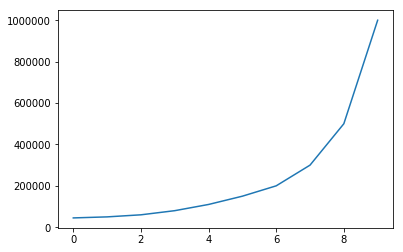

In [18]:
plt.plot(datos_salarios['Salary'])
plt.show();

Claramente podemos ver que la relación que existe entre los salarios y los niveles no es lineal

## Definimos nuestros Datos de Prueba y Entrenamiento

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Explicación del código:

- **test_size = 0.2**: dividiremos las 10 observaciones de nuestros datos en dos partes, los *datos de prueba* y los *datos de entrenamiento*, nuestro conjunto de *datos de prueba* será construido a razón de 0.2 a partir de los datos originales i.e la 5a parte de dichos datos.

- **train_size**: asigna el resto de los datos al *conjunto de entrenamiento*

- **random_state**: fijamos la semilla para generar números aleatorios.


## Modelo de Regresión

Una vez definidos los conjuntos de *entrenamiento* y *prueba*, debemos emplear los modelos de regresión adecuados.

Para contrastar, primero someteremos los datos al modelo de **Regresión Lineal Simple**

### Regresión Lineal Simple

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Explicación del código:

- **sklearn**: librería que contiene diversos métodos estadísticos, hace un "clon" de R para uso en Python

- **LinearRegression()**: sirve para indicar la variable a la que se le asignará la regresión

- **fit(X, y)**: genera la regresión tomando como variable dependiente *y* e independiente *X*

#### Visualizamos el resultado de la Regresión Lineal Simple

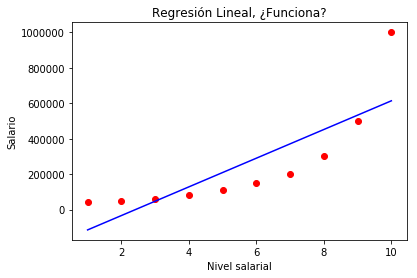

In [21]:
def visualiza_regresion_lineal():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Regresión Lineal, ¿Funciona?')
    plt.xlabel('Nivel salarial')
    plt.ylabel('Salario')
    plt.show()
    return

visualiza_regresion_lineal();

#### Explicación del código:

- **visualiza_regresion_lineal()**: función construida por nosotros, no tiene ningún argumento; sirve para gráficar el resultado de la Regresión Lineal previamente implementada.

- **plt.scatter(X, y, color='red'**: graficamos *X* y *y* con dispersión, los puntos serán de color rojo

- **plt.title()**: damos el encabezado de la gráfica

- **plt.xlabel(), plt.ylabel()**: damos los nombres de los ejes *x* y *y* respectivamente

- **plt.show()**: muestra el gráfico con todas las especificaciones previas. Es importante que sea el último comando en la serie de especificaciones (si se agregan especificaciones después de éste, no aparecerán en el gráfico)

- **return**: por sintaxis de Python, todas las funciones se cierran con este comando. Se puede especificar qué se desea que regrese la función. En términos matemáticos, es el valor de *f(x)*

A partir de nuestro gráfico, ya podemos notar que la Regresión Lineal Simple no se ajusta adecuadamente a nuestros datos, de modo que una predicción hecha sobre este modelo sería erronea. Contrastemos entonces con la Regresión Polinomial

### Regresión Polinomial

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Explicación del código:

- **PolynomialFeatures**: librería que sirve para ajustes por polinomios

- **poly_reg**: en esta variable guardaremos nuestro polinomio de grado 4 (degree=4)

- **X_poly**: en esta variable guardaremos nuestros datos de *X* transformados en polinomio


#### Visualizamos los resultados de la Regresión Polinomial

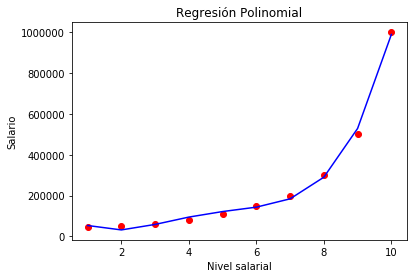

In [23]:
def visualiza_regresion_polinomial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Regresión Polinomial')
    plt.xlabel('Nivel salarial')
    plt.ylabel('Salario')
    plt.show()
    return

visualiza_regresion_polinomial();

Es notoria la mejora en el ajuste de los datos. De manera visual se puede concluir que la Regresión Polinomial nos dio un mejor ajuste que su contraparte lineal. Ahora veamos qué sucede en efectos de la predicción.

### Predicciones bajo ambos modelos

Según nuestros datos, ¿cuál debería ser el salario para una persona que tiene 5.5 años de experiencia laboral?

#### Predicción bajo Regresión Lineal Simple

In [24]:
lin_reg.predict([[5.5]])


array([249500.])

Bajo el modelo de Regresión Lineal Simple, el salario para alguien con 5 años y medio de experiencia es de *$249,500*

#### Predicción bajo Regresión Polinomial

In [25]:

pol_reg.predict(poly_reg.fit_transform([[5.5]]))


array([132148.43750008])

Bajo el modelo de Regresión Polinomial, el salario para esa misma persona es de *$132,148.43*

## Conclusiones

Es evidente que las predicciones entre el modelo lineal y el polinomial son muy distintas (la diferencia son más de $100,000)

Si observamos nuestra gráfica de datos original, podemos ver que el salario esperado para alguien con 5 años y medio de experiencia debe estar en el rango de $110,000 a $150,000, pero la predicción según el modelo lineal es de *$249,500*.

Nótese que nuestra predicción bajo el modelo polinomial es de *$132,148.43*, el cual entra perfectamente en el rango.